# Lab 1
Noah Kim

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
matplotlib.rc('font', size=22)
import numpy as np
import pandas as pd
from scipy import stats

# Standard Normal Distribution μ=0, σ=1
A Gaussian disribution is $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, for mean value $\mu$ and standard deviation $\sigma$.

The standard normal distribution is the Gaussian distribution of a random variable of mean $\mu=0$ and standard deviation $\sigma=1$. When a value lies outside the mean, the distance from the mean to the value can be expressed as a multiple of the standard deviation expressed in "z-score". For example, a value with a "z-score of 3"corresponds to the point located $3\sigma$ from $\mu$. The following table is a Z table for Standard Normal Distribution, the probability a value may lie between 0 and Z. 

The probability that a number from the distribution lies within a particular range of z-scores is found by integrating the Gaussian function from one z-score to the other.

| z   | +0.00   | +0.01   | +0.02   | +0.03   | +0.04   | +0.05   | +0.06   | +0.07   | +0.08   | +0.09   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0.0 | 0.00000 | 0.00399 | 0.00798 | 0.01197 | 0.01595 | 0.01994 | 0.02392 | 0.02790 | 0.03188 | 0.03586 |
| 0.1 | 0.03983 | 0.04380 | 0.04776 | 0.05172 | 0.05567 | 0.05962 | 0.06356 | 0.06749 | 0.07142 | 0.07535 |
| 0.2 | 0.07926 | 0.08317 | 0.08706 | 0.09095 | 0.09483 | 0.09871 | 0.10257 | 0.10642 | 0.11026 | 0.11409 |
| 0.3 | 0.11791 | 0.12172 | 0.12552 | 0.12930 | 0.13307 | 0.13683 | 0.14058 | 0.14431 | 0.14803 | 0.15173 |
| 0.4 | 0.15542 | 0.15910 | 0.16276 | 0.16640 | 0.17003 | 0.17364 | 0.17724 | 0.18082 | 0.18439 | 0.18793 |
| 0.5 | 0.19146 | 0.19497 | 0.19847 | 0.20194 | 0.20540 | 0.20884 | 0.21226 | 0.21566 | 0.21904 | 0.22240 |
| 0.6 | 0.22575 | 0.22907 | 0.23237 | 0.23565 | 0.23891 | 0.24215 | 0.24537 | 0.24857 | 0.25175 | 0.25490 |
| 0.7 | 0.25804 | 0.26115 | 0.26424 | 0.26730 | 0.27035 | 0.27337 | 0.27637 | 0.27935 | 0.28230 | 0.28524 |
| 0.8 | 0.28814 | 0.29103 | 0.29389 | 0.29673 | 0.29955 | 0.30234 | 0.30511 | 0.30785 | 0.31057 | 0.31327 |
| 0.9 | 0.31594 | 0.31859 | 0.32121 | 0.32381 | 0.32639 | 0.32894 | 0.33147 | 0.33398 | 0.33646 | 0.33891 |
| 1.0 | 0.34134 | 0.34375 | 0.34614 | 0.34849 | 0.35083 | 0.35314 | 0.35543 | 0.35769 | 0.35993 | 0.36214 |

SciPy provides a cumulative distribution function cdf that integrates the PDF from  −∞  to z. Since we want to integrate from 0 to z, we subtract the integral over  −∞  to 0 from the integral over  −∞  to z.

In [3]:
large_increments = np.linspace(0, 1, 11)
small_increments = np.linspace(0, 0.09, 10)
table = np.zeros((len(large_increments), len(small_increments)))

for i in range(len(large_increments)):
    for j in range(len(small_increments)):
        table[i][j] = stats.norm.cdf(large_increments[i] + small_increments[j]) - stats.norm.cdf(0)

pd.DataFrame(table, columns=small_increments, index=large_increments)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.000000,0.003989,0.007978,0.011966,0.015953,0.019939,0.023922,0.027903,0.031881,0.035856
0.1,0.039828,0.043795,0.047758,0.051717,0.055670,0.059618,0.063559,0.067495,0.071424,0.075345
0.2,0.079260,0.083166,0.087064,0.090954,0.094835,0.098706,0.102568,0.106420,0.110261,0.114092
0.3,0.117911,0.121720,0.125516,0.129300,0.133072,0.136831,0.140576,0.144309,0.148027,0.151732
0.4,0.155422,0.159097,0.162757,0.166402,0.170031,0.173645,0.177242,0.180822,0.184386,0.187933
0.5,0.191462,0.194974,0.198468,0.201944,0.205401,0.208840,0.212260,0.215661,0.219043,0.222405
0.6,0.225747,0.229069,0.232371,0.235653,0.238914,0.242154,0.245373,0.248571,0.251748,0.254903
0.7,0.258036,0.261148,0.264238,0.267305,0.270350,0.273373,0.276373,0.279350,0.282305,0.285236
0.8,0.288145,0.291030,0.293892,0.296731,0.299546,0.302337,0.305105,0.307850,0.310570,0.313267
0.9,0.315940,0.318589,0.321214,0.323814,0.326391,0.328944,0.331472,0.333977,0.336457,0.338913


The probability that a value lies at least $1\sigma$ to the left of the mean is about 0.159, for $2\sigma$ away it's 0.023, and for $5\sigma$ away it's 2.867*10-7. To find the z-score of these probabilities, we use the percent-point function ppf.

In [4]:
probabilities = np.array([0.1587, 0.0227, 2.8665e-07])
print(stats.norm.ppf(probabilities))

[-0.99981509 -2.00092939 -5.00000106]


these are approximately $1\sigma$, $2\sigma$, and $5\sigma$. The negative sign on each value indicates that it falls to the left of the mean (which is at 0). Since we're integrating the PDF starting at $-\infty$.

# Chi-Squared Distribution, k = 5

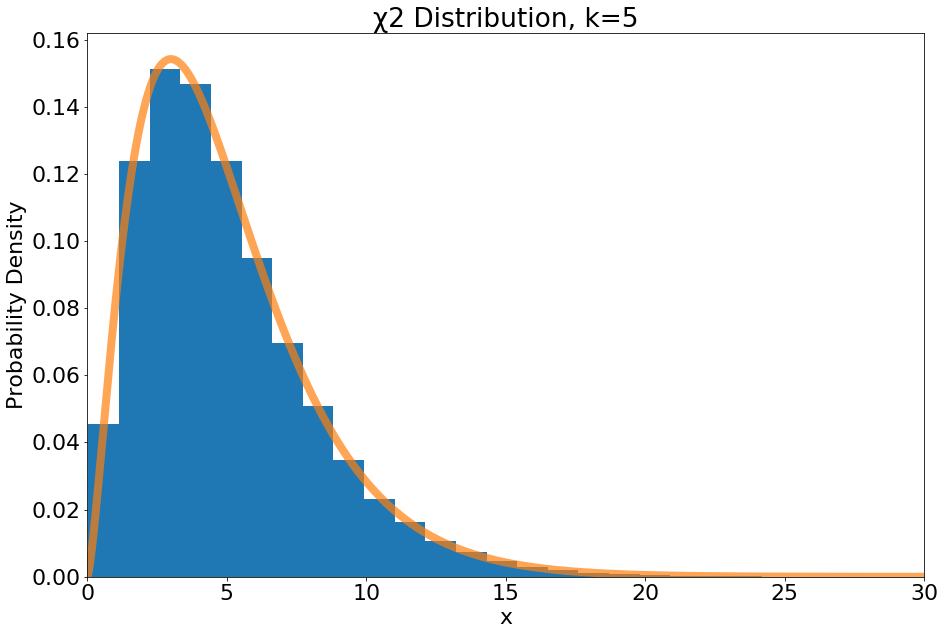

In [6]:
dist = stats.chi2(5)
samples = dist.rvs(100000)

plt.title("χ2 Distribution, k=5")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.hist(samples, 30, density=True)
plt.xlim([0, 30])
x = np.linspace(0, 30, 1000)
plt.plot(x, dist.pdf(x), linewidth = 8, alpha = 0.7);

In [34]:
dist.sf(5)

0.4158801869955079

In [35]:
stats.norm.ppf(dist.sf(5))

-0.212444369274859

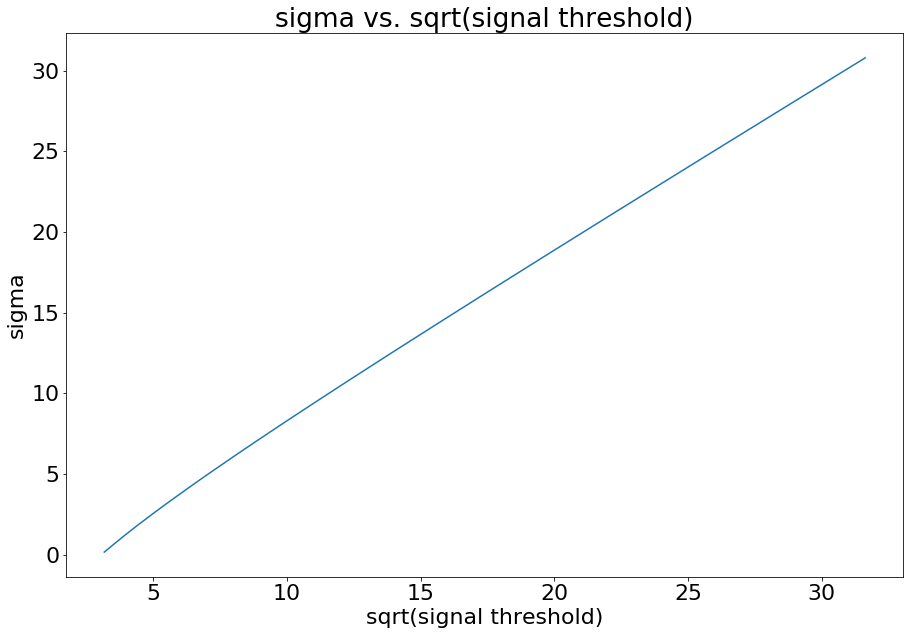

In [27]:
signals = np.linspace(10, 1000, 200)
sigmas = np.abs(stats.norm.ppf(dist.sf(signals)))

plt.title("sigma vs. sqrt(signal threshold)")
plt.xlabel("sqrt(signal threshold)")
plt.ylabel("sigma")
plt.plot(np.sqrt(signals), sigmas);

# Binomial Distribution

In [28]:
def plot_coinflips(num_flips, p=0.5, width=5):
    dist = stats.binom(num_flips, p)
    num_successes = np.arange(0, num_flips + 1)
    plt.title(f"Probability of k heads for {num_flips} coin flips")
    plt.xlabel("Number of heads, k")
    plt.ylabel("Probability Mass")
    plt.vlines(num_successes, 0, dist.pmf(num_successes), linewidth=width)
    plt.xlim(0, num_flips)
    plt.ylim(0, None)

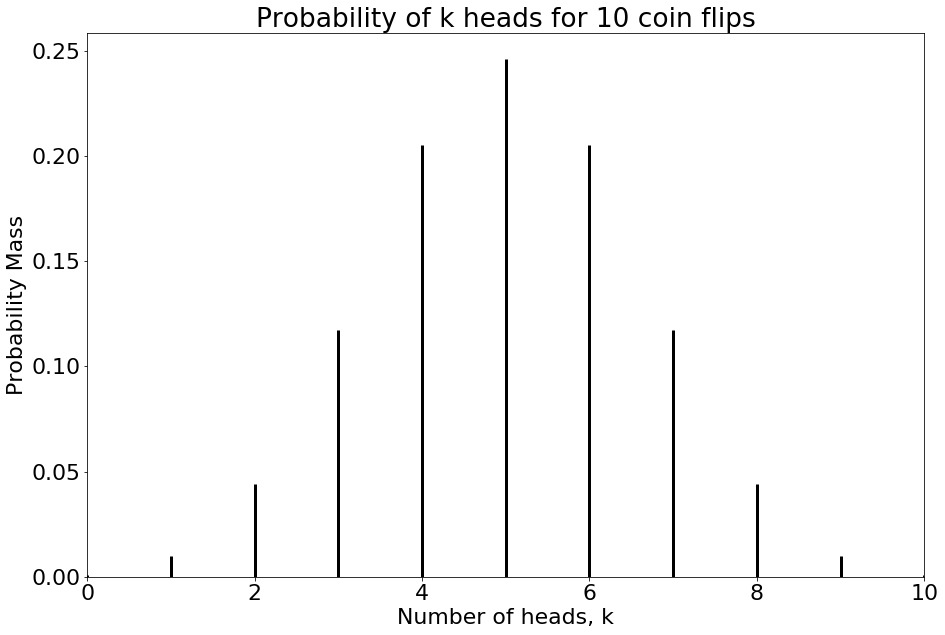

In [29]:
plot_coinflips(10, width=3)

In [30]:
sum(stats.binom.pmf(np.arange(0, 6), 10, 0.5))

0.6230468750000006

In [32]:
sum(stats.binom.pmf(np.arange(0, 5001), 10_000, 0.5))

0.5039893230694178